# Tensorflow and Google Colab Tutorial

## Import the needed libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation

## Saving and Reading files to Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
save_data = np.asarray([[1, 2, 3], [4, 5, 6]])
print(save_data)

[[1 2 3]
 [4 5 6]]


In [0]:
np.savetxt("/content/drive/My Drive/try.txt", save_data)

In [0]:
read_data = np.genfromtxt("/content/drive/My Drive/try.txt")
print(read_data)

[[1. 2. 3.]
 [4. 5. 6.]]


## Getting dataset for training from tensorflow

In [2]:
mnist = tf.keras.datasets.mnist
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
## Converting the datas to float values as well as changing their range from "0.0" to "1.0"
x_train, x_test = x_train / 255.0, x_test / 255.0 

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
# Check training and test data sizes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


## Define your Model

In [4]:
def my_model_1H():
    model = Sequential()

    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

def my_model_2H():
    model = Sequential()

    model.add(Flatten(input_shape=(28, 28)))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

def my_model_5H():
    model = Sequential()

    model.add(Flatten(input_shape=(28, 28)))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

## Training and Evaluating

In [5]:
batch_size = 512
epochs = 5

model = my_model_1H()

print("Start Training .....................")
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
print("Training Done .....................")

print("Evaluation.....................")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Start Training .....................
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6332 - accuracy: 0.8216 - val_loss: 0.2822 - val_accuracy: 0.9237
Epoch 2/5
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2812 - accuracy: 0.9207 - val_loss: 0.2096 - val_accuracy: 0.9422
Epoch 3/5
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2232 - accuracy: 0.9370 - val_loss: 0.1700 - val_accuracy: 0.9504
Epoch 4/5
60000/60000 [==============================] - 1s 10us/sample - loss: 0.1857 - accuracy: 0.9471 - val_loss: 0.1471 - val_accuracy: 0.9583
Epoch 5/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1608 - accuracy: 0.9535 - val_loss: 0.1322 - val_accuracy: 0.9614
Training Done .....................
Evaluation.....................
Test loss: 0.13221264145411551
Test accuracy: 0.9614


In [6]:
batch_size = 1
epochs = 5

model = my_model_1H()

print("Start Training .....................")
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
print("Training Done .....................")

print("Evaluation.....................")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Start Training .....................
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 59s 975us/sample - loss: 0.2659 - accuracy: 0.9222 - val_loss: 0.1415 - val_accuracy: 0.9593
Epoch 2/5
60000/60000 [==============================] - 58s 963us/sample - loss: 0.1831 - accuracy: 0.9510 - val_loss: 0.1291 - val_accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.1662 - accuracy: 0.9589 - val_loss: 0.1748 - val_accuracy: 0.9645
Epoch 4/5
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.1633 - accuracy: 0.9627 - val_loss: 0.1471 - val_accuracy: 0.9698
Epoch 5/5
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1575 - accuracy: 0.9638 - val_loss: 0.1564 - val_accuracy: 0.9683
Training Done .....................
Evaluation.....................
Test loss: 0.15638989334995712
Test accuracy: 0.9683


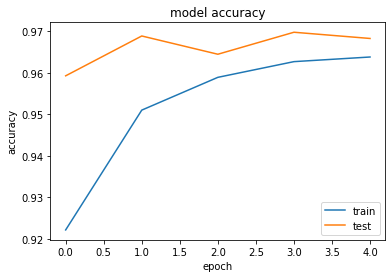

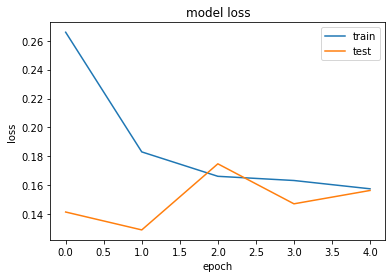

In [12]:
plt.figure(0)
# print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
# plt.savefig("/content/drive/My Drive/model_accuracy.png")

# summarize history for loss
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

plt.show()

## Use Your Model for Prediction

Prediction: 6


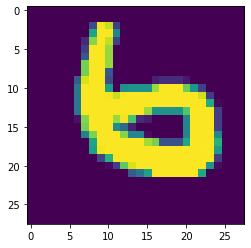

In [13]:
i = np.random.randint(x_test.shape[0], size=1)
img = x_test[i]
plt.imshow(img.reshape((28, 28)))
pred = np.argmax(model.predict(img))
print("Prediction:", pred)